# TubeTracker: Automated Trending Video Scraper and Email Notifier

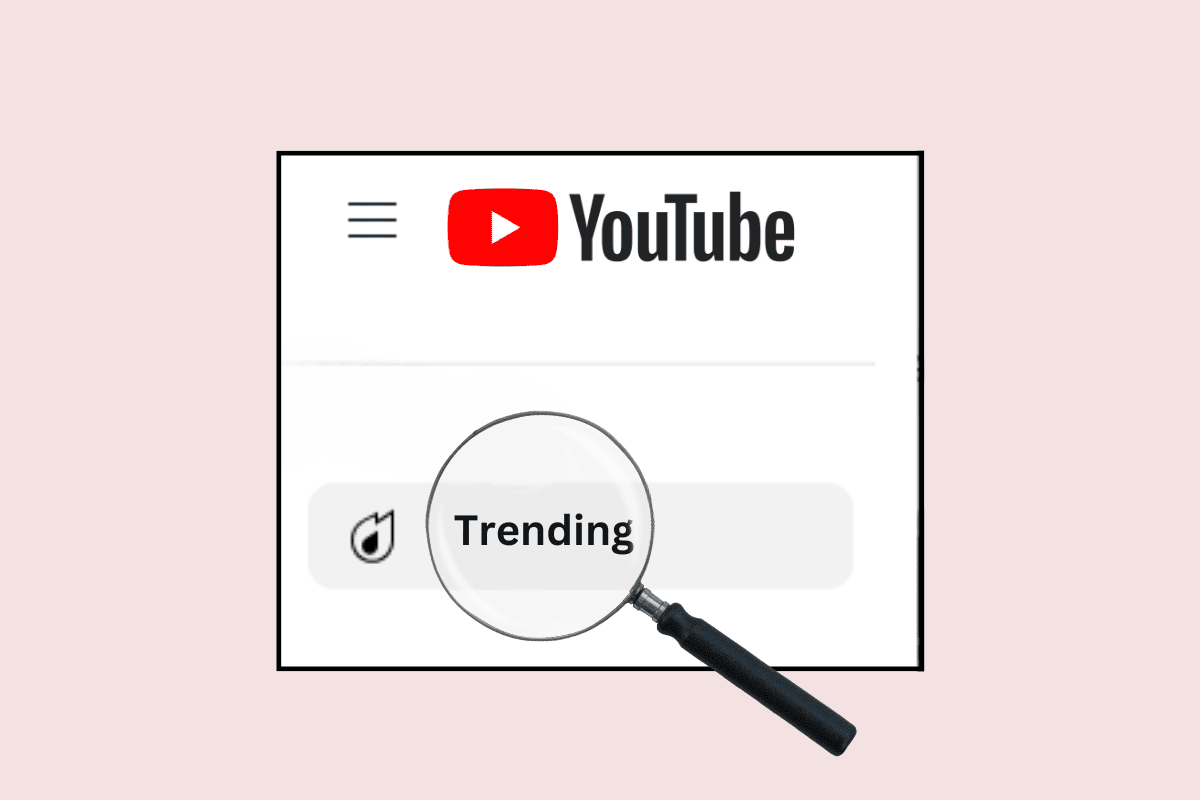

## About Selenium : 
`Selenium` is a popular open-source tool used for automating web browsers.

In this project, Selenium's role is to automate the process of scraping the top trending page of YouTube. It will be used to launch a web browser, navigate to the `Youtube trending page`, extract information about the top trending videos, such as their titles, view counts, and URLs, and then send this data to the desired email address. By leveraging Selenium, the project can achieve web scraping in a controlled and automated manner, making it easier to collect and process the required information from YouTube.

    This project leverages Selenium for automating web interactions and parsing dynamic content, along with smtplib for sending emails. Selenium enables the script to simulate user actions like clicking buttons and navigating through web pages, crucial for scraping dynamic content from websites like YouTube. Meanwhile, smtplib facilitates sending the extracted data via email, ensuring seamless communication of information to desired recipients.

Here are the steps we would follow:
- Extract information about the top 10 trending videos.
- Collect data such as video title, channel name, view count, and video URL.
- Save the extracted data into a CSV file.
- Use smtplib to send the CSV file via email

### Why `Selenium` and not `Beautiful Soup` 
    BeautifulSoup:
        Think of BeautifulSoup as a tool that helps you make sense of a messy book. You give it a messy book (HTML webpage), and it helps you find and extract the information you need from that book.
        It's great for scraping information from web pages that are mostly just text and images, like reading a recipe from a cooking website.
    
    Selenium: 
        Now, imagine you want to get information from a magical book that changes its pages as you read it. This book (web page) has buttons you need to click to reveal the next part of the story.
        Selenium is like a magical hand that can turn the pages and click the buttons for you. It interacts with the webpage just like a real person would, so you can scrape the information you need even from dynamic or interactive websites, like YouTube's trending page that updates in real-time.

-  In the context of scraping the top trending page of YouTube, since the trending page relies heavily on JavaScript to load and display content dynamically, Selenium would be a better choice as it can simulate user interactions and wait for the content to load before scraping it.

## Lets begin:

In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

In [12]:
# This function creates a WebDriver instance for Google Chrome with specific options configured.
def get_driver():
    # Create an instance of ChromeOptions, allowing us to set various browser options.
    chrome_options = webdriver.ChromeOptions()
    
    # Configure Chrome options:
    # Disable sandboxing to prevent issues in certain environments.
    chrome_options.add_argument('--no-sandbox')
    
    # Run Chrome in headless mode (without a graphical interface) for automated tasks.
    chrome_options.add_argument('--headless')
    
    # Create a WebDriver instance for Google Chrome with the configured options.
    driver = webdriver.Chrome(options=chrome_options)
    
    # Return the WebDriver instance for further use.
    return driver


The first cell imports necessary modules and submodules required in this project. `webdriver` is a submodule in selnium which further 
contains submodules which have `options` and `by` classes.The Options class is used to create a `webdriver`. A `WebDriver` is a tool or interface that allows you to automate interactions with a web browser. It provides a way to control a browser programmatically. WebDriver implementations exist for different web browsers, such as Chrome, Firefox, Safari, and Edge. They provide a standardized way to interact with browsers using various programming languages, making it easier to automate web tasks and perform web testing.

So the next cell was a function which uses the above classes and send us the webdrive for interaction with Chrome browser.

In [13]:
driver=get_driver()

A driver object is created upon invoking the `get_driver` function which now will be used for interacting with the `trending page` of youtube programatically

In [14]:
YOUTUBE_TRENDING_URL = 'https://www.youtube.com/feed/trending'

`YOUTUBE_TRENDING_URL` is the link which will be parsed

In [16]:
driver.get(YOUTUBE_TRENDING_URL)

The driver object created has a method `get()` which takes the URL as an argument and instructs the WebDriver to open the specified URL.

In [33]:
VIDEO_DIV_TAG = 'ytd-video-renderer'
videos = driver.find_elements(By.TAG_NAME, VIDEO_DIV_TAG)
type(videos)

list

At this step the driver is instructed to find those elements by their `tag` having the given `VIDEO_DIV_TAG`. This is done using the `find_elements()` method which returns a WebElement object representing that element.

Lets retrieve the the `Title` of the first video in the page. first we will store the element of the first video into a variable `video`, then we will use the `find_element()` method to retrieve the title_tag element and then at last `.text` attribute is used to retrieve the text(basically the title of the video).

#### Title

In [43]:
video=videos[0]
title_tag = video.find_element(By.ID, 'video-title')
title_tag.text

'Happy Holi Babu | the mridul | Pragati | Nitin'

#### URL :
We can use the `get_attribute()` method to get the url of the video.

In [53]:
title_tag.get_attribute('href') 

'https://www.youtube.com/watch?v=Xlkd8gdSNBo'

#### Thumbnail URL

In [51]:
thumbnail_tag = video.find_element(By.TAG_NAME, 'img')
thumbnail_tag.get_attribute('src')


'https://i.ytimg.com/vi/Xlkd8gdSNBo/hqdefault.jpg?sqp=-oaymwEcCPYBEIoBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLBf_X3eUhO3xwLlPJfgjX3aU_f-Hg'

#### Channel Name

In [50]:
channel_div = video.find_element(By.CLASS_NAME, 'ytd-channel-name')
channel_div.text

'The MriDul'

#### Description

In [56]:
video.find_element(By.ID, 'description-text').text

'Hello Doston👋🏻🥰 Download Zupee App: https://app.adjust.com/1awq33sj?redirect=https%3A%2F%2Fwww.zupee.com%2F Code - MRIDUL15 “ आप हँसते रहो, हम हँसात...'

Now, we will write functions to combine what we have done above and get all the details at once for any given video element

In [100]:
def parse_video(video):
  title_tag = video.find_element(By.ID, 'video-title')
  title = title_tag.text
  url = title_tag.get_attribute('href')
  
  thumbnail_tag = video.find_element(By.TAG_NAME, 'img')
  thumbnail_url = thumbnail_tag.get_attribute('src')

  channel_div = video.find_element(By.CLASS_NAME, 'ytd-channel-name')
  channel_name = channel_div.text
  
  description = video.find_element(By.ID, 'description-text').text

  return {
    'title': title,
    'url': url,
    'thumbnail_url': thumbnail_url,
    'channel': channel_name,
    'description': description
  }

lets have information about third trending video 

In [101]:
parse_video(videos[2])

{'title': 'HOLI DHAMAAL 2024 || Rachit Rojha',
 'url': 'https://www.youtube.com/watch?v=YoAPFqhLICc',
 'thumbnail_url': None,
 'channel': 'Rachit Rojha',
 'description': 'Happy Holi Everyone 😍❤️ --------------------------------------------------------------------------------- Follow me on Instagram: https://www.instagram.com/rachitrojha ----------------------...'}

### Sending Result via email

We have parsed the page and got the necessary information succesfully. The next step is to send this information via sender's email to recieptent's email.For this we will use the `smtplib` and `os` libraries provided available. 

The below shown function takes the body of the email to be sent as parameter and sends the email to the reciever email provided to it. 
Steps the function follows:

- This function sends an email using Gmail SMTP server with SSL encryption.
    - The sender's email and password must be provided as environment variables.
        - 'GMAIL_PASSWORD' must contain the sender's Gmail password.
    - The recipient's email address is hardcoded within the function.
    - The subject of the email is fixed to 'YouTube Trending Videos'.
    - The email is sent in plain text format.

In [59]:
def send_email(body):
  try:
    server_ssl = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server_ssl.ehlo()   

    SENDER_EMAIL = 'rythammaalpani44@gmail.com'
    RECEIVER_EMAIL = 'frellancerytham@gmail.com'
    SENDER_PASSWORD = os.environ['GMAIL_PASSWORD']
    
    subject = 'YouTube Trending Videos'

    email_text = f"""
    From: {SENDER_EMAIL}
    To: {RECEIVER_EMAIL}
    Subject: {subject}

    {body}
    """

    server_ssl.login(SENDER_EMAIL, SENDER_PASSWORD)
    server_ssl.sendmail(SENDER_EMAIL, RECEIVER_EMAIL, email_text)
    server_ssl.close()

  except:
      print('Something went wrong...')

## Summary 

Here's what we have done: 

-  Extract information about the top 10 trending videos.
-  Collect data such as video title, channel name, view count, and video URL.
-  Save the extracted data into a CSV file.
-  Use smtplib to send the CSV file via email

Now, we will write functions to combine what we have done above and get all the details of the top 10 trenidng videos

In [111]:
import smtplib
import os
import json
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By


YOUTUBE_TRENDING_URL = 'https://www.youtube.com/feed/trending'

def get_driver():
  chrome_options = Options()
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome(options=chrome_options)
  return driver

def get_videos(driver):
  VIDEO_DIV_TAG = 'ytd-video-renderer'
  driver.get(YOUTUBE_TRENDING_URL)
  videos = driver.find_elements(By.TAG_NAME, VIDEO_DIV_TAG)
  return videos

def parse_video(video):
  title_tag = video.find_element(By.ID, 'video-title')
  title = title_tag.text
  url = title_tag.get_attribute('href')
  
  thumbnail_tag = video.find_element(By.TAG_NAME, 'img')
  thumbnail_url = thumbnail_tag.get_attribute('src')

  channel_div = video.find_element(By.CLASS_NAME, 'ytd-channel-name')
  channel_name = channel_div.text
  
  description = video.find_element(By.ID, 'description-text').text

  return {
    'title': title,
    'url': url,
    'thumbnail_url': thumbnail_url,
    'channel': channel_name,
    'description': description
  }

def send_email(body):
  try:
    server_ssl = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server_ssl.ehlo()   

    SENDER_EMAIL = 'rythammaalpani44@gmail.com'
    RECEIVER_EMAIL = 'frellancerytham@gmail.com'
    SENDER_PASSWORD = os.environ['GMAIL_PASSWORD']

    
    subject = 'YouTube Trending Videos'

    email_text = f"""
        From: {SENDER_EMAIL}
        To: {RECEIVER_EMAIL}
        Subject: {subject}
        
        {body}
    """


    server_ssl.login(SENDER_EMAIL, SENDER_PASSWORD)
    server_ssl.sendmail(SENDER_EMAIL, RECEIVER_EMAIL, email_text)
    server_ssl.close()

  except:
      print('Something went wrong...')


if __name__ == "__main__":
  print('Creating driver')
  driver = get_driver()

  print('Fetching trending videos')
  videos = get_videos(driver)
  
  print(f'Found {len(videos)} videos')

  print('Parsing top 10 videos')
  videos_data = [parse_video(video) for video in videos[:10]]
  
  print('Save the data to a CSV')
  videos_df = pd.DataFrame(videos_data)
  videos_df.to_csv('trending.csv', index=None)
  print("Send the results over email")
  body = json.dumps(videos_data, indent=2)
  send_email(body)

  print('Finished.')


Creating driver
Fetching trending videos
Found 97 videos
Parsing top 10 videos
Save the data to a CSV
                                               title  \
0     Happy Holi Babu | the mridul | Pragati | Nitin   
1                         MY BEST HAPPY HOLI GADGETS   
2                  HOLI DHAMAAL 2024 || Rachit Rojha   
3  LOVE or ARRANGE MARRIGE ? QnA With My Wife 😂 D...   
4  किससे छिप रहे है Dr.Haathi? | Taarak Mehta Ka ...   
5  25 मार्च 2024 का चंद्र ग्रहण भारत में कितने बज...   
6  The Great Indian Kapil Show Official Trailer |...   
7  Ghum Hai Kisikey Pyaar Meiin | Ep.1164 | Highl...   
8          Making The RIGHT Choice (HARD) | SlayyPop   
9    I Paid A Lie Detector To Investigate My Friends   

                                           url  \
0  https://www.youtube.com/watch?v=Xlkd8gdSNBo   
1  https://www.youtube.com/watch?v=UDjvLknqNY8   
2  https://www.youtube.com/watch?v=YoAPFqhLICc   
3  https://www.youtube.com/watch?v=wT3b6OCIylU   
4  https://www.youtube.com/watc

## Future Work 
-  Enhanced Data Analysis: Extend the project to include data analysis capabilities, such as calculating average view counts, identifying trending patterns over time, or analyzing correlations between video metrics (e.g., views, likes, comments).
-  Social Media Sharing: Enable sharing of trending videos directly to social media platforms (e.g., Twitter, Facebook) from within the TubeTracker interface, allowing users to share interesting videos with their followers.

## References
[1] Python offical documentation. https://docs.python.org/3/

[2] Sending Email with Python: https://stackabuse.com/how-to-send-emails-with-gmail-using-python/

[3] Selenium tutorial: https://www.browserstack.com/guide/python-selenium-to-run-web-automation-test

[4] Aakash N S,Workshop - Web Scraping with Selenium & AWS, https://jovian.com/learn/introduction-to-programming-with-python/lesson/workshop-web-scraping-with-selenium-aws-python

[5] Pandas library documentation. https://pandas.pydata.org/docs/

[6] Working with Jupyter Notebook https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd